<a href="https://colab.research.google.com/github/jvataidee/MachineLearning/blob/master/COVID-textos/COVID_19_Kaggle_Textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 - Kaggle Textos - Parte 1
Em resposta à pandemia do COVID-19, a Casa Branca com os principais grupos de pesquisa dos USA, prepararam o conjunto de dados aberto de pesquisa do COVID-19.<p>

Tais pesquisas resultaram mais de 57.000 artigos acadêmicos, incluindo mais de 45.000 com texto completo, sobre COVID-19, SARS-CoV-2 e coronavírus relacionados. <p>
Esse conjunto de dados disponível gratuitamente é fornecido à comunidade de pesquisa global para aplicar os recentes avanços no processamento de linguagem natural e outras técnicas de IA para gerar novos insights em apoio à luta contínua contra essa doença infecciosa.

- Link para o desafio: https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge

Devido à crescente urgência e a rápida aceleração na nova literatura sobre coronavírus, dificultando o acompanhamento da comunidade de pesquisa médica. Em detrimento a isso, há presente pesquisa, tem como objetivo identificar por meio de ML, reconhecer entidades, palavras chaves de documentos, similaridades entre os documentos e agrupalos, facilitando então a comunidade médica.

Adaptado: Jones Granatyr - IA Expert


## Instalação e importação das bibliotecas

In [ ]:
#bibliotecas principais
import numpy as np
import zipfile
import pandas as pd
import glob
import json
import seaborn as sns
import spacy
import nltk
from IPython.core.display import HTML
from matplotlib import pyplot as plt


In [ ]:
# configurar a visualização
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [ ]:
#instalando bibliotecas de termos
!pip install scispacy

In [ ]:
#importando bibliotecas de termos
import scispacy

In [ ]:
#instalando bibliotecas de termos médicos
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_md-0.2.4.tar.gz

In [ ]:
#importando bibliotecas de termos médicos
import en_core_sci_md

In [ ]:
!python -m spacy download en

## Carregamento dos arquivos

Os arquivos aqui utilizados estão no formato zipfile, contidos no google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
#desconpactando arquivos
path = '/content/gdrive/My Drive/CORD-19-research-challenge.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

## Criação do dataframe com os textos

In [ ]:
#colunas que serão acessadas
corona_features = {'paper_id': [], 'title': [],
                   'abstract': [], 'text': []}

In [ ]:
#transformando em DataFrame
corona_df = pd.DataFrame.from_dict(corona_features)

In [ ]:
#realizando a leitura dos arquivos, nas pastas do dietório e sub-diretórios, no formato json.
json_filenames = glob.glob(f'{"./"}//**/*.json', recursive = True)

In [ ]:
#quantidade de arquivos
len(json_filenames)

29316

In [ ]:
# função para percorrendo cada artigo da base de dados e extrair as informações
def return_corona_df(json_filenames, df):
  for file_name in json_filenames:
    linha = {'paper_id': None, 'title': None,
           'abstract': None, 'text': None}
    
    with open(file_name) as json_data:
      if file_name == './sample_data/anscombe.json':  #despreza o arquivo de controle do colab
        continue
      
      data = json.load(json_data)

      linha['paper_id'] = data['paper_id'].strip() # retira os epaços em branco
      linha['title'] = data['metadata']['title'].strip()

      abstract_list = [abstract['text'] 
                       for abstract in data['abstract']]
      abstract = '\n '.join(abstract_list) 
      linha['abstract'] = abstract.strip()

      text_list = [text['text'] 
                   for text in data['body_text']] 
      text = '\n '.join(text_list)
      linha['text'] = text.strip()

      df = df.append(linha, ignore_index = True)
  return df

In [ ]:
#Executando a função
corona_df = return_corona_df(json_filenames, corona_df)

In [ ]:
corona_df.shape

(29315, 4)

In [ ]:
corona_df.head()

,paper_id,title,abstract,text
0,ec66e69291414e8f29b5db27eecbc8e9cdcf2c20,Competitive Fitness in Coronaviruses Is Not Co...,Positive-stranded viruses synthesize their RNA...,essential processing by proteinases located in...
1,e494ed8c504a8312c9df7936a8fc832e86d444e6,Detection of rickettsial DNA in ticks and wild...,The tick is a well-known vector for arthropod-...,Arthropods transmit zoonotic pathogens to anim...
2,af9e845d14fdb65bcb14b59b0f3ddc76a9517c5a,Outbreak of febrile respiratory illness associ...,,"Since their discovery in 1953, human adenoviru..."
3,2def385170922c5786ea00a64f0c139460d23e2c,Mucosal Delivery of ACNPV Baculovirus Driving ...,Mucosal vaccination against amoebiasis using t...,Entamoeba histolytica is a protozoan parasite ...
4,4a8c5f46f5d234453c3c498a85a2ffb261e584c4,Virologic study of acute lower respiratory tra...,Acute lower respiratory tract infections (ALRT...,"In 2008, 1.8 million children under 5 years of..."


In [ ]:
#texto do primeiro artigo
corona_df['text'][0]

"essential processing by proteinases located in nsp3 (18) and nsp5 (19) . Electron microscopy suggests that nsp3 induces membrane proliferation (17) . nsp3 and nsp4 localize predominantly to the CM in DMV clusters (4, 9, 20) and are sufficient to induce structures resembling CMs in the absence of other viral proteins (17) . Mutations in nsp4 have been linked to formation of aberrant DMVs with apparent defects in membrane pairing (21) . nsp6 from several coronaviruses causes single-membrane LC3containing vesicles (22) to accumulate around microtubule organization centers (17) , although it is not clear how this is connected to the formation of DMV clusters.\n Some replicase subunits work together in units known as cistrons. Five cistrons (0, I, II, IV, and VI) have been defined, with gaps left in the naming scheme in case new cistrons are discovered that map to nsp13 and nsp15, respectively (14, 23) . Complementation studies using temperature-sensitive (ts) mutants of mouse hepatitis vi

In [ ]:
#número de palavrass do primeiro artigo
len(corona_df['text'][0])

28527

# Pré-processamento



## Valores faltantes

Existe um erro assosiado ao algoritimo, neste alguns dos dado são convertidos em valores nulos, tendo em vista isso, nesta etapa realizamos a exclusão, com o intuito de manter a integridade dos resultados.

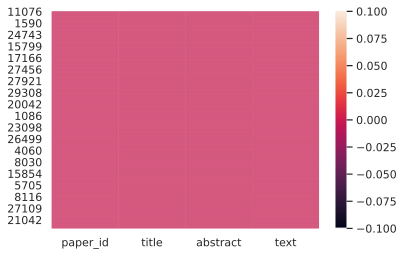

In [ ]:
#mapa de calor dos valores faltantes
sns.heatmap(corona_df.isnull());

Não foi encontrado valores faltantes (*nan*) nessa base de dados, sendo então necessário realizar uma verificação mais aprofundada, considerando os espaços vazios.

In [ ]:
len(corona_df[corona_df['paper_id'] == ''])

0

In [ ]:
len(corona_df[corona_df['title'] == ''])

3583

In [ ]:
len(corona_df[corona_df['abstract'] == ''])

8051

In [ ]:
len(corona_df[corona_df['text'] == ''])

0

Excluindo então esses artigos, sem título e resumos.

In [ ]:
corona_df = corona_df[corona_df['title'] != '']

In [ ]:
corona_df = corona_df[corona_df['abstract'] != '']

In [ ]:
corona_df.shape

(20343, 4)

## Valores duplicados

Alguns valores também são duplicados, desta forma é necessário também esta correção.

In [ ]:
#Retirando os valores duplicados
corona_df.drop_duplicates(['abstract', 'text', 'title'], inplace = True)

In [ ]:
corona_df.shape

(20211, 4)

## Amostra da base de dados

Realizando uma amostra aleatória do df.

In [ ]:
corona_df = corona_df.sample(n = 600, random_state = 1)

In [ ]:
corona_df.shape

(600, 4)

In [ ]:
corona_df.head()

,paper_id,title,abstract,text
11076,1a52404c7cdc68445f80cb3ddde5781d4ec5cbe5,Bovine coronaviruses associated with enteric a...,Bovine coronavirus isolates associated with re...,Bovine coronavirus (BCoV) is a member of the f...
13457,2266f41b6b514f091339454e491b830d00b2383f,"Prevalence, phylogenetic and evolutionary anal...",Porcine deltacoronavirus (PDCoV) is a novel po...,Coronaviruses are single-stranded positive-sen...
1291,8b9992937c24368f15eb03e7009ba85beadab1e2,Prevalence and Incidence of Respiratory Syncyt...,Background. The high burden of respiratory syn...,Respiratory syncytial virus (RSV) is the most ...
11483,be83cbc46b78b4b3a81c6db1a7dc6004e7ad5f38,Respiratory syncytial virus in Brazilian infan...,"Background: Each year, a considerable amount o...",Acute Viral Bronchiolitis (AVB) is the most co...
919,ac209c3960cd2a4996e560dfefb2bfdc924b6cdb,N-Myc expression enhances the oncolytic effect...,N-myc oncogene amplification is associated but...,Neuroblastoma (NB) is the most common cancer i...


In [ ]:
corona_df.tail()

,paper_id,title,abstract,text
20161,35f06fe8870be0c3cd7f0e9b47872a59c7590d7d,Modulation of the Immune Response to Respirato...,Background: Vitamin D deficiency has been show...,Viral acute respiratory infections (ARI) are a...
27688,3f23d2283c45fc77411d8b9cc748ddf8d1de15e8,viruses Advances in MERS-CoV Vaccines and Ther...,Middle East respiratory syndrome (MERS) corona...,Middle East respiratory syndrome (MERS) corona...
16995,aa8b246a6ace4ef2784775bae44250f4ac54aa0e,Absolute quantitation of infectious salmon ana...,Routine laboratory diagnosis of infectious sal...,Infectious salmon anaemia (ISA) is a highly fa...
11045,edcd72779c065a19742dc23ada42010e367f8acb,Application of next generation sequencing tech...,The surveillance and prevention of pathogenic ...,The prevention and control of contamination ca...
6429,58f6d8f3a463781bce61681da7d3156784240bf4,Recombination of 5′ subgenomic RNA3a with geno...,RNA-RNA recombination salvages viral RNAs and ...,Genetic RNA recombination contributes signific...


In [ ]:
#texto de exemplo
sample_text = corona_df['text'][6429]
sample_text

"Genetic RNA recombination contributes significantly to the high genetic variability of RNA viruses, and RNA-RNA crossovers have been observed both in natural RNA virus sequences (Allison et al., 1989; Becher et al., 2001; Bujarski and Figlerowicz, 1998; Molenkamp et al., 2000) , and by using experimental systems (Bujarski and Kaesberg, 1986; Figlerowicz et al., 1998; Lai, 1992; Adair and Kearney, 2000; Bruyere et al., 2000; Hu et al., 2003; Mikkelsen et al., 2000) . While some viruses can recombine by re-joining of genomic RNA fragments (Gmyl et al., 2003) , most of the RNA virus systems are thought to recombine via replicase switching mechanisms (reviewed in Agol, 2006; Alejska et al., 2001; Hu et al., 2003) . Specifically, primer extension have been demonstrated during RNA replication for flaviviruses (Ranjith-Kumar et al., 2002a) , tombusviruses (Nagy et al., 1999b; Shapka and Nagy, 2004) , Poliovirus (Kirkegaard and Baltimore, 1986; Guillot et al., 2000) , nidoviruses (Lai et al.,

## Função para pré-processamento

In [ ]:
#importando os padrões das termologias importadas do spacy
nlp = en_core_sci_md.load(disable=['tagger', 'parser', 'ner'])
nlp.max_length = 2000000

In [ ]:
#palavras não indicadas para o processamento de linguagem natural
print(spacy.lang.en.stop_words.STOP_WORDS)

{'me', 'many', 'why', "'m", 'sometime', '‘s', 'upon', 'namely', 'very', 'others', 'amount', 'beforehand', 'per', 'off', 'sometimes', 'towards', 'please', '‘ve', 'did', 'anyone', 'call', 'on', 'fifty', 'former', 'because', 'those', 'twelve', 'become', 'besides', 'due', 'her', 'back', 'regarding', 'while', 'his', 'wherein', 'whence', 'do', 'everywhere', 'nobody', 'say', 'side', 'as', 'although', 'whom', 'might', 'seems', 'n‘t', 'may', 'themselves', 'had', 'have', 'everyone', '’ve', 'moreover', 'from', 'becomes', 'who', 'them', "n't", 'through', 'am', 'doing', 'using', '’d', '’ll', 'anyway', 'forty', 'he', 'ourselves', 'perhaps', 'the', 'bottom', 'down', 'all', 'except', 'really', 'whole', 'everything', 'give', 'was', 'we', 'yours', 'already', 'becoming', 'any', 'nowhere', 'is', 'could', 'for', 'whatever', 'against', 'up', 'about', 'yet', 'via', 'somehow', 'mine', 'must', 'nevertheless', 'no', 'or', 'noone', 'out', 'when', 'i', 'their', 'there', 'will', 'anyhow', 'my', 'alone', 'both', 'n

In [ ]:
len(spacy.lang.en.stop_words.STOP_WORDS)

326

In [ ]:
# Adicionando novas stop words a base
new_stop_words = ['et', 'al', 'doi', 'copyright', 'http', 'https', 'fig', 'table', 'result', 'show']
for word in new_stop_words:
  nlp.vocab[word].is_stop = True

In [ ]:
def spacy_tokenizer(sentence):
  sentence = sentence.lower()
  list = []
  list = [word.lemma_ for word in nlp(sentence) if not (word.is_stop or #diminuindo a dimensionalidade dos dados 
                                                        word.like_num or
                                                        word.is_punct or
                                                        word.is_space or
                                                        len(word) == 1)]
  list = ' '.join([str(element) for element in list])

  return list

In [ ]:
corona_df['text'] = corona_df['text'].apply(spacy_tokenizer)

In [ ]:
len(sample_text)

45708

In [ ]:
#Stop Words retirados
len(corona_df['text'][6429])

29930

# Termos frequentes

Primeira gunta a ser respondida é:

*   Quais são os termos que mais se repetem?



In [ ]:
for index, row in corona_df.iterrows():
  print(row['paper_id'], row['title'])
  text_file = open('corpus/' + row['paper_id'] + '.txt', 'w')
  n = text_file.write(row['text'])
  text_file.close()

In [ ]:
from nltk.corpus import PlaintextCorpusReader
corpus = PlaintextCorpusReader('corpus', '.*')

In [ ]:
files = corpus.fileids()

In [ ]:
#Exemplo de arquivos
files[0]

'00ae0041374cbbf28df0d2cbeb08c1396a4f7878.txt'

In [ ]:
words = corpus.words()
print(words)

['background', '5', '′-', 'triphosphorylated', '2', ...]


In [ ]:
len(words)

1953351

In [ ]:
#frequencia de palavras
frequency = nltk.FreqDist(words)
most_common = frequency.most_common(100)
most_common

[('-', 77349),
 ('.', 26665),
 ('cell', 16658),
 ('virus', 12857),
 ('/', 12661),
 ('di', 11910),
 ('al', 9699),
 ('protein', 9539),
 ('infection', 8698),
 ('study', 8441),
 ("'", 6988),
 ('viral', 5669),
 ('show', 5594),
 ('la', 5322),
 ('high', 4984),
 ('il', 4932),
 ('patient', 4876),
 ('gene', 4756),
 ('disease', 4686),
 ('1', 4663),
 ('sequence', 4600),
 ('rna', 4529),
 ('group', 4498),
 ('result', 4338),
 ('human', 4280),
 ('sample', 4200),
 ('l', 4160),
 ('include', 3999),
 ('figure', 3910),
 ('datum', 3891),
 ('level', 3792),
 ('time', 3736),
 ('control', 3672),
 ('fig', 3661),
 ('increase', 3658),
 ('report', 3599),
 ('response', 3598),
 ('mouse', 3585),
 ('case', 3562),
 ('analysis', 3500),
 ('test', 3435),
 ('expression', 3288),
 ('find', 3209),
 ('antibody', 3139),
 ('sars', 3116),
 ('bind', 3098),
 ('different', 3079),
 ('assay', 3041),
 ('model', 3036),
 ('infect', 3017),
 ('type', 3003),
 ('activity', 2996),
 ('low', 2959),
 ('day', 2942),
 ('strain', 2898),
 ('cov', 289

# Nuvem de palavras

In [ ]:
from matplotlib.colors import ListedColormap

#definição das cores
color_map = ListedColormap(['#21e6c1', '#278ea5','#1f4287', '#071e3d'])

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color = 'white', max_words = 150, colormap = color_map)

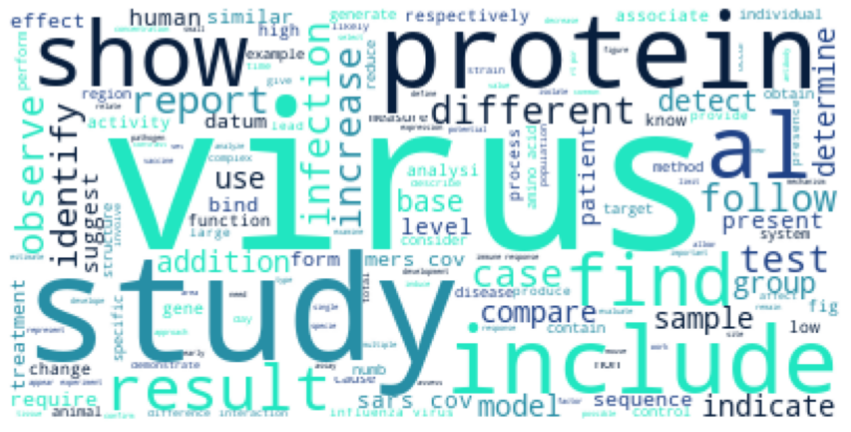

In [ ]:
cloud = cloud.generate(corona_df['text'].str.cat(sep='\n'))
plt.figure(figsize=(15,18))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
corona_df.to_csv('corona_df.csv')

# Extração de entidades nomeadas


1.  Saber o que é [Entidades](http://www.seer.ufu.br/index.php/dominiosdelinguagem/article/view/36955).




## Testes com a função
Onde a partir dos textos, iremos identificar as mutações por país que foram identificados em cada artigo. Sendo necessário identificar inicialmente a extração de entidades de localização.

In [ ]:
#texto de referência
text = str(corona_df['text'][6429])

In [ ]:
#Carregando o spact em inglês
nlp_ent = spacy.load('en')
nlp_ent.max_length = 2000000
doc = nlp_ent(text)

Segundo o Spacy, as entidades de estados e continentes sãoÇ</p>
 

*   NORP -  entidade da nacionalidade
*   GPE - São continentes, cidades e estados




In [ ]:
#rfiltrando todas as entidades de nacionalidades e estados
for entity in doc.ents:
  if entity.label_ == 'NORP' or entity.label_ == 'GPE':
    print(entity.text, entity.label_)

tripartite GPE
dsrna GPE
strand GPE
pgem NORP
rnas GPE
strand GPE
c. quinoa GPE
solińska GPE
polya GPE
trna GPE
trna GPE
3′ NORP
oligo GPE
pgem NORP


## Contagem das entidades na base de dados

Feitos os testes em um texto, agora iremos fazer para toda a base de dados, porem somente das localizações. Identificando os países com mais pesquisas ou com mais casos.

In [ ]:
gpe =  []

for index, row in corona_df.iterrows():
  text =  row["text"]
  doc =  nlp_ent(text)
  for entity in doc.ents:
    if entity.label_ == "GPE":
      gpe.append(str(entity.text))


In [ ]:
print(gpe)

['turkey', 'ncd', 'mebus strain', 'ncd strain', 'hcov', 'canada', 'oklahoma', 'kansas', 'bcov', 'hai', 'bcq.2590', 'bcq.2590', 'mebus', 'mabs', 'hai', 'mabs', 'ncd', 'hai', 'hai', 'mabs', 'hai', 'mebus strain', 'ncd-bcov', 'canada', 'ncd-associated mebus strain', 'bcov', 'bcov', 'hcov-oc43', 'hcov-oc43', 'ncd', 'mabs', 'ncd', 'encode envelope', 'louisiana', 'hai', 'hai', 'ncd', 'ncd', 'louisiana', 'hong kong', 'hong kong', 'encode', 'ohio', 'south korea', 'china', 'thailand', 'laos', 'china', 'china', 'china', 'henan province', 'china', 'china', 'henan province', 'china', 'henan province', 'beijing', 'china', 'nanjing', 'china', 'shanghai', 'china', 'china', 'jq065043', 'china', 'south korea', 'thailand', 'henan province', 'henan province', 'china', 'henan province', 'henan', 'henan', 'henan', 'china', 'henan province', 'china', 'henan province', 'china', 'henan', 'guangdong', 'south korea', 'china', 'henan', 'henan province', 'henan', 'henan', 'henan', 'henan', 'henan', 'china', 'chin

In [ ]:
values_gpe, counts_gps = np.unique(np.array(gpe), return_counts = True)

In [ ]:
gpe_df =  pd.DataFrame({"value": values_gpe, "counts":counts_gps })

In [ ]:
gpe_df.head()

,value,counts
0,-eosinophilia,1
1,-ossi,1
2,/m,1
3,1-way,1
4,1.8(2.7,1


Inúmera palavra identificadas, foram selecionadas erroneamente, desta for foi necessário extrair somente as palavras que mais se repetiram.

In [ ]:
gpe_df_filtro = gpe_df[gpe_df.counts > 50]

In [ ]:
gpe_df_filtro.shape

(27, 2)

In [ ]:
gpe_df_filtro

,value,counts
213,australia,57
259,beijing,66
318,brazil,51
371,canada,54
429,china,793
645,delle,79
735,egypt,62
858,france,66
887,germany,146
1036,hong kong,303


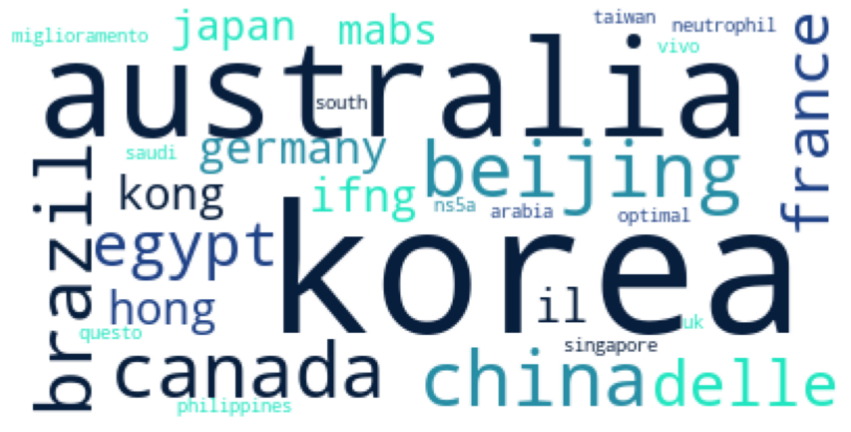

In [ ]:
local = cloud.generate(gpe_df_filtro['value'].str.cat(sep='\n'))
plt.figure(figsize=(15,8))
plt.imshow(local)
plt.axis('off')
plt.show()